In [6]:
import matplotlib
from matplotlib.pyplot import *
from numpy import *
import pylab as plt
from mpmath import *
mp.dps=100

In [2]:
def newton(f,df,x0,precision):
    n=0
    x = [x0]
    while (abs(f(x[-1]))>10**(-precision)) and (n<10):
        n+=1
        x.append(x[-1]-f(x[-1])/df(x[-1]))
    return x

In [3]:
def secant(f,x0,xm1):
    xs=[xm1,x0]
    for i in range(10):
        xs.append( (xs[-1]*f(xs[-2])-xs[-2]*f(xs[-1])) / (f(xs[-2])-f(xs[-1])) )
    return xs[-1]

In [4]:
def bisection(f,a,b):
    for i in range(20):#May need to increase i for better aprox
        c = (a+b)/2
        if abs(f(c))<1/10**10:
            print("zero found: ",c)
            return c
        if f(a)*f(c)<0:
            b=c
        else:
            a=c
        print("[",a,",",b,"]: f(",c,")=",f(c))

<function matplotlib.pyplot.show(*args, **kw)>

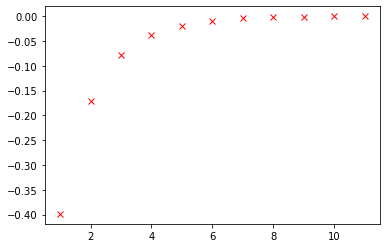

In [5]:
#OPTIONAL verify quadratic convergence of Newton method
def f(y):
    return y**3 / 3 - 2*y**2 + y - 4

def df(y):
    return y**2 - 4*y + 1
x0=8
result= newton(f,df,x0,50)
numberofdigitsoversquare=[]
ns=[]
n=0
for x in result:
    n=n+1
    ns.append(n)
    numberofdigitsoversquare.append(float(-log(abs(x-3**mpf(0.5)))/log(10))/2**n)
plt.plot(ns,numberofdigitsoversquare,"rx")
plt.show

In [6]:
#Lagrange interpolation

def pi(x,i,xs):
    xi = xs[i]
    res = 1
    for xj in xs:
        if xj != xi:
            res = res * (x-xj)/(xi-xj)
    return res

def lagrange(x,ys,xs):
    res = 0
    for i in range(len(ys)):
        res = res + ys[i]*pip(x,i,xs)
    return res

In [7]:
#Polynomial fit
def findas(m,xs,ys):
    A=array([[0]*(m+1)]*(m+1))
    b=array([0]*(m+1))
    for k in range(m+1):
        b[k]=sum(xs**k*ys)
        for i in range(m+1):
            A[k,i]= sum(xs**(i+k))
    coefs=linalg.solve(A,b)
    print(coefs)
    def fit(x):
        return sum(coefs*(x**array(range(len(coefs)))))
    return fit

In [8]:
xs = array([1,2,3,4,5,6])
ys = array ([-5.21659 ,2.53152 ,2.05687 ,14.1135 ,20.9673 ,33.5652])
ft = findas(2,xs,ys)

[-4.75       -0.00892857  1.0625    ]


[-4.75       -0.00892857  1.0625    ]


<function matplotlib.pyplot.show(*args, **kw)>

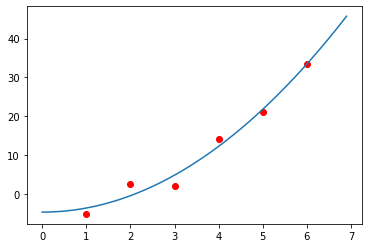

In [22]:
ft=findas(2,xs,ys)
xd=arange(0,7,0.1)
y=list(map(lambda x: ft(x), xd))
plt.plot(xs,ys,'ro')
plt.plot(xd,y)
#plt.show

In [10]:
def findbiggest(row):
    absrow = [abs(r) for r in row]
    return absrow.index(max(absrow))

In [11]:
def swap(A,b,i,j):
    Atmp = array(A[i])
    A[i] = A[j]
    A[j] = Atmp
    btmp = b[i]
    b[i] = b[j] 
    b[j] = btmp

In [12]:
def gauss(A,b):
    n = len(b)
    # elimination phase
    for j in range(0,n-1): #iteration over pivots
        swap(A,b,j+findbiggest(A[j:,j]),j)  # PIVOTING
        for i in range(j+1,n): #iteration over lines below pivot
            lam = A[i,j]/A[j,j]
            A[i] = A[i] - lam*A[j] # update line i of matrix A
            b[i] = b[i] - lam*b[j] # update element i  of vector b
    # substitution phase
    x = zeros(n)
    for j in range(n-1,-1,-1):
        x[j]  = b[j]/A[j,j]
        b = b - x[j]*A[:,j]
    return x

In [8]:
#Trapezoidal Rule
def trapezoidal(f,a,b,n):
    fs = list(map(lambda x: f(x), arange(a,b+(b-a)/n,(b-a)/n)))
    return (sum(fs)-(fs[0]+fs[-1])*0.5)*(b-a)/n

In [9]:
#Midpoint Rule
def midpoint(f,a,b,n):
    fs = list(map(lambda x: f(x), arange(a+(b-a)/2/n,b+(b-a)/2/n,(b-a)/n)))
    return sum(fs)*(b-a)/n

In [10]:
#Simpson's Rule
#def simpson(f,a,b,n):
 #   fs= list(map(lambda x: f(x),arange(a,b+(b-a)2/n,(b-a)/2/n)))
  #  return sum(fs)*(b-a)/3+sum(fs)

In [11]:
def simpson1(f,a,b,n):
    h=(b-a)/n
    for i in range(n):
        res=f(a+h/2+i*h)*2*h/3
    for j in range(1,n):
        ras=f(a+j*h)*h/3
    return res+ras+(h/6)*(f(a)+f(b))

In [12]:
def simpson(f,a,b,n):
    return (trapezoidal(f,a,b,n)+2*midpoint(f,a,b,n))/3

In [13]:
print(simpson(cos,0,1,100)-sin(1))

0.000000000002921776679252196593606957855578798518162064779617542567383118827602130508905791227360477513715362182


In [19]:
def f(x):        
    return 2./(x**2+1)

In [20]:
print(simpson(f,-1,1,1000))

3.14159265358979321465878992937741914501900970308617976847113536383078827220474828732621017857156581


In [21]:
xd=arange(-1,1,0.1)
y=list(f(x) for x in xd)
ysim=[simpson(f(x),-1,1,1000) for x in xd]

plt.plot(xd, ysim)
plt.plot(xd,y,'ro')
plt.show

TypeError: 'mpf' object is not callable

In [7]:
def dfaprox(x,h):
    return (f(x-2*h)-f(x+2*h)+8*f(x+h)-8*f(x-h))/(12*h)

In [8]:
def f(x):
    return cos(x) # just some simple sample function
def df(x):
    return -sin(x) # 

In [9]:
#Richardson Extrapolation
p=2
h1=1/100
h2=1/200
def Richardson(x):
    return (dfaprox(f,x,h2)*(h1/h2)**p-dfaprox(f,x,h1))/((h1/h2)**p-1)

In [10]:
def error(x,h): # experimental error
    return dfaprox(x,h)-df(x)